# Plot loss curve and show inference sentences

 - Pre-training
    - Emotion dialogue data (cleaning)
       - loss ... over fitting in early steps
       - inference(10 Epoch) ... valid data: most of sentences are similar and have many [数詞] [人名]
       - inference(30 Eposh) ... train data: not changing each emotion
    - OpenSubtitles 
       - loss ... validation loss is not stable
       - inference(13 Epoch) ... most of them have only one word (but short input and reference)
    - Twitter dataset
       - loss ... smooth curve (valid decrease, increase)
       - inference(5 Epoch) ... natural but simple and dull
 -  Fine-tuning
     - all loss curve ... over-fitting in early steps

     - Op_sub -> emo_dial (cleaning)
        - inference(13 Epoch -> 4 Epoch, 13 Epoch -> 2 Epoch) ... many repitition
     -  Twitter -> emo_dial (cleaning)
        - inference(5 Epoch -> 4 Epoch) ... more natural but many  [数詞] [人名]
     -  Twitter -> emo_dial (all) 
        - infenrence(5 Epoch -> 2 Epoch) ... more various but many  [数詞] [人名] but domain can't  be decided
     -  Twitter -> emo_dial (all)  -> emo_dial (cleaning)
        - infenrence(5 Epoch -> 2 Epoch -> ) ... more various but many  [数詞] [人名]

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [20]:
def plot_loss(log_path, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(20)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.show

In [49]:
log_path_cleaning = "../../emotion_dialogue_model/log/train20190207000624.log"
#log_path_all = "../../emotion_dialogue_model/log/train20190205141303.log" 

log_path_new_tw = "../../emotion_dialogue_model/log/train20190206121006.log" 
log_path_former_tw = "../../emotion_dialogue_model/log/train20190128001030.log" 

log_path_tw5_cl = "../../emotion_dialogue_model/log/train20190207000501.log"
log_path_tw3_all = "../../emotion_dialogue_model/log/train20190206220036.log"
log_path_tw83_all = "../../emotion_dialogue_model/log/train20190210090648.log" 
log_path_tw83_cl = "../../emotion_dialogue_model/log/train20190210091505.log"
log_path_tw5_all = "../../emotion_dialogue_model/log/train20190206225509.log" 
log_path_tw5_all10_cl = "../../emotion_dialogue_model/log/train20190208151444.log"
log_path_tw5_all20_cl = "../../emotion_dialogue_model/log/train20190207002610.log" 
log_path_tw5_all34_cl = "../../emotion_dialogue_model/log/train20190207012453.log" 
log_path_tw5_all40_cl = "../../emotion_dialogue_model/log/train20190207000624.log" 
log_path_tw5_all60_cl = "../../emotion_dialogue_model/log/train20190207004548.log"

log_path_op = "../../emotion_dialogue_model/log/train20190128001146.log" 
log_path_op13_all = "../../emotion_dialogue_model/log/train20190208225526.log" 

# ☆　Only twitter
## former twitter (learning rate 1e-4)

Data directory: ../data/twitter_dial/extend

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_twitter_0128

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

inf_last: False

decoder_learning_ratio: 5.0

dropout: 0.1

PAD_id: 0

num_layers: 2

UNK_id: 3

MAX_UTTR_LEN: 100

max_gradient: 50.0

Minimize validation loss(5.8435) : 6 Epoch 


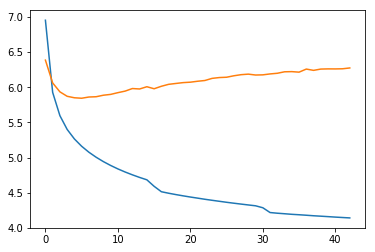

In [102]:
plot_loss(log_path_former_tw, 90)

In [142]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0128_4.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model\
                    --beam_width 5

INFO:logger:Data directory: ../../data/twitter_dial/splitted
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_twitter_0128_4.mdl
INFO:logger:Use emotion: False
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 0.0001
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:UNK_id: 3
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:decay_step: 600000
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:max_epoch: 100
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: False
INFO:logger:hidden_size: 256
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Rea

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: へぇ～。マスターって、この辺のことだったら、なんでも知ってんじゃん
tgt: アッハトゥング。全軍侵入者を排除せよ
1[-0.40]: アッハトゥング。全軍侵入者を排除せよ 
2[-0.46]: さすがですマスターマスターのこの功績を皆に伝えないと 
3[-0.61]: 敵の通信の傍受ですか 
4[-1.81]: なにか任務ですか 
5[-2.15]: マスター、アレを私にに呼ばれた 

Dial 2:
src: おはよ
tgt: おはあり♡
1[-1.71]: おはよ 
2[-2.55]: おはあり 
3[-2.62]: おはよー 
4[-3.25]: おはよう 
5[-3.51]: おは 

Dial 3:
src: じゃあやる笑 ぶれぶれやわ笑
tgt: もうっ、オヒラくん どっちだしっwwww
1[-4.71]: やる 
2[-4.87]: おけ 
3[-5.05]: わかった 
4[-5.76]: え 
5[-7.14]: しゃーなし 

Dial 4:
src: かわいいのはお前だ、...乙女座のフドウ
tgt: フ・・・かわいいのはシュラ、あなたの方ではないのですか
1[-1.02]: 小宇宙壁ガード離れなさい。いつまでもそうしている 
2[-1.04]: 小宇宙壁ガード離れなさい 
3[-1.25]: あなたは何を言っているのです 
4[-1.38]: 小宇宙壁ガード離れなさい。いつまでもそうしているところだ 
5[-1.46]: 小宇宙壁ガード離れなさい。いつまでもそうしている・・・ 

Dial 5:
src: ほんとね... ついたとしてどうやって戻ってくるのか ́ω`
tgt: 戻ってこれないオチ
1[-4.35]: 同じく 
2[-4.35]: 大丈夫 
3[-6.48]: がんばれー 
4[-6.53]: お気を付けて 
5[-7.16]: 同じく... 

Dial 6:
src: 嘘だーっうわーんっ。゚ヽ゚`Д ゚́ノ゚。← あ、そっかー...そりゃダメか...んじゃデートの為に一緒に頑張ってみる
tgt: 嘘じゃないよおおお

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f07490f3438>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

## new twitter (learning rate 1e-5)

Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_twitter_0206

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

max_epoch: 300

decay_step: 600000

tfd_lambda: 0.4

learning_rate: 1e-05

hidden_size: 256

SOS_id: 1

inf_last: False

dropout: 0.1

max_gradient: 50.0

lr_decay: 0.5773502691896258

batch_size: 64

l2_pooling: False

Minimize validation loss(5.5964) : 83 Epoch 


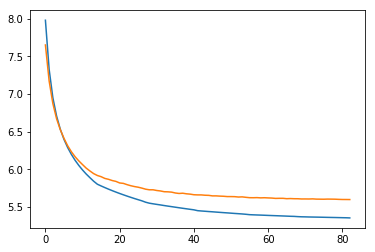

In [40]:
plot_loss(log_path_new_tw, 90)

In [143]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_10.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

INFO:logger:Data directory: ../../data/twitter_dial/splitted
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_twitter_0206_10.mdl
INFO:logger:Use emotion: False
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 1e-05
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:UNK_id: 3
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:decay_step: 600000
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:max_epoch: 300
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: False
INFO:logger:hidden_size: 256
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Rea

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 現時点で女の子の霊ってのは確定かな
tgt: 声が女の子だったからねw
1[-6.64]: それ 
2[-7.02]: あ 
3[-7.23]: あー 
4[-7.72]: あ、なるほど 
5[-8.69]: あそこ 

Dial 2:
src: 今度食ってみるわ
tgt: ハマるよ
1[-5.32]: うん 
2[-5.84]: え 
3[-6.00]: 今忙しいから話しかけんな 
4[-6.96]: おっぱい 
5[-7.06]: お 

Dial 3:
src: GUNDAM
tgt: ヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノヾ ́༎ຶ ۝ ༎ຶノ
1[-5.56]: え 
2[-6.90]: お 
3[-6.99]: おk 
4[-7.00]: おっぱい 
5[-9.72]: え、 

Dial 4:
src: 誕生日おめでとう
tgt: ありがとー
1[-2.83]: ありがとう 
2[-3.28]: ありがと 
3[-3.36]: ありがとー 
4[-3.64]: おつあり 
5[-6.21]: ありがとう〜 

Dial 5:
src: タナトス★今日はやけに機嫌が良さそうだな。何かいいことでもあったのかい
tgt: うむ。昼の拝 ⁇ 、大儀である。
1[-2.07]: すまないが今は忙しいのだ。また後で返事をさせてもらう 
2[-2.19]: すまないが今は忙しいのだ。また後で返事をさせてもらうぜ 
3[-2.34]: すまないが今は忙しいのだ。また後で返事をさせてもらう... 
4[-2.35]: すまないが今は忙しいのだ。また後で返事をさせてもらうよ 
5[-2.35]: すまないが今は忙しいのだ。また後で返事をさせてもらうわ 

Dial 6:
src: あんまり絶頂に達してると脳にダメージくるなって思う。
tgt: じゃ、中途半端でいいо ́∀о
1[-5.80]: なるほど 
2[-7.54]: 確かに 
3[-7.65]: なるほどw 
4[-8.33]: なるほど... 
5[-8

In [8]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_45.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あっそー、じゃあ待ってろ、ちゃんと起きろよ
tgt: ついてくんなよ。遊ぶんだろ
1[-3.09]: ええ、その友達のためにも 
2[-3.17]: ......叫ばなくても聞こえるんだ 
3[-3.18]: ......大人しくしろ 
4[-3.27]: ええ 
5[-4.53]: へえ 

Dial 2:
src: しね
tgt: ちょっとだけ
1[-1.71]: しね 
2[-1.78]: うるせだまれ 
3[-4.23]: あほ 
4[-4.33]: え 
5[-5.28]: うるせ 

Dial 3:
src: うん... お金あれば買ってたけどね笑
tgt: 買うよ あったら買ってたもん笑
1[-5.54]: うんうん 
2[-5.60]: だよね 
3[-5.83]: うん 
4[-7.40]: お金貯まらない 
5[-7.94]: お金貯まったら買う 

Dial 4:
src: 私は真面目に謝らないといけない。↓ 劇場版と放課後楽園委員会とカゲロウアクターズの皆さんに。。。
tgt: しぐちゃんどうしたと・ω・
1[-6.76]: え 
2[-7.01]: えそうなの 
3[-7.91]: え、そうなの 
4[-8.30]: え、まじか 
5[-9.13]: え、なにそれ 

Dial 5:
src: ですよね...。 でも、あそこだけは、ゆずぽんコールゆずれません笑
tgt: 完全に同意です。あと、自分もJK卒業式当選したので参戦しますよ
1[-5.75]: ですよね 
2[-5.80]: そうなんですね 
3[-5.90]: そうなんですか 
4[-6.57]: ですよね笑 
5[-6.97]: そうなんですか笑 

Dial 6:
src: 金を積めば伸びた
tgt: 全鳥して～～
1[-5.85]: それ 
2[-6.96]: まてまてまて 
3[-7.13]: まてまてまてまてまて 
4[-7.96]: まて 
5[-8.63]: 1万 

Dial 7:
src: なんて呼んだらいい
tgt: かおんでいいよ好きなように なんて

In [9]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_45.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: やりたいです
tgt: わぁい ́∀♪松パートお願いしたい←←
1[-3.56]: ありがとうございます 
2[-3.96]: お願いします 
3[-4.63]: はい 
4[-5.31]: DMお願いします 
5[-6.23]: やりましょ 

Dial 2:
src: こんばんはゞ やはり埼玉とは違います...。フレームはすべて同じという設定ですから。
tgt: こんばんは♪ そうですね 今日 所用で神奈川まで行って来ました。やはり、暖かかったです♪ ガンダムフレームって、どれも一緒なのですか
1[-4.91]: そうなんですね 
2[-4.93]: ありがとうございます 
3[-5.44]: そうですね 
4[-5.52]: そうですよね 
5[-9.11]: そうなんですね 海外です 

Dial 3:
src: 営業車に自分の会社の名前が書いてないのをいいことに爆音でカーステレオ鳴らすものがかり。
tgt: 俺もよくベガスとかホルモン流してテンション上げながら訪問してるな。
1[-2.69]: CADYTALKEYHHERSTER 
2[-2.86]: CADYTALKEYHERSTER 
3[-3.09]: CADYTALKEYTALK 
4[-3.40]: CADYTALKEYHHER 
5[-3.44]: CADYTALKEYTALD 

Dial 4:
src: かわいい
tgt: 照れた
1[-3.84]: かわいい 
2[-4.28]: ありがとう 
3[-4.53]: 可愛くない 
4[-4.88]: 可愛い 
5[-6.19]: かわいくない 

Dial 5:
src: ありがとう⌒▽⌒ すごくは、ないかも笑
tgt: いやいやすごいからホントにおめでとうおめでとう
1[-4.11]: いえいえ 
2[-5.03]: いえいえー 
3[-5.18]: うん 
4[-5.19]: いえいえw 
5[-5.46]: いーえ 

Dial 6:
src: 今、7番ホールの前に着いた お腹空いた
tgt: 今そっち向かうねー♡
1[-3.

In [41]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_83.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

INFO:logger:Data directory: ../../data/twitter_dial/splitted
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_twitter_0206_83.mdl
INFO:logger:Use emotion: False
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:EOS_id: 2
INFO:logger:learning_rate: 1e-05
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:batch_size: 1
INFO:logger:PAD_id: 0
INFO:logger:use_emotion: False
INFO:logger:max_epoch: 300
INFO:logger:decay_step: 600000
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:tfd_lambda: 0.4
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Rea

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: おう、初だ
tgt: っしゃあ
1[-5.20]: ん 
2[-5.45]: おうよろしくな 
3[-5.50]: おう 
4[-5.54]: やった 
5[-7.20]: あ、ごめん 

Dial 2:
src: いえす超楽しい
tgt: バレルかダイナモかモデラーしか使えなくなってきてる
1[-4.81]: それな 
2[-5.37]: やばいよね 
3[-5.41]: だよね 
4[-5.87]: やばい 
5[-7.33]: たのしい 

Dial 3:
src: どんなんなるか想像つかないよね
tgt: かなり未知だよなぁ けど3部も当初、かなり想像付かなくて、蓋を開いてみたら大好評だったし、今回もそうなると良いよね 取り敢えず億泰くん可愛いなw
1[-4.46]: わかる 
2[-4.59]: それな 
3[-4.89]: そうそう 
4[-5.35]: それね 
5[-6.81]: そうそう笑 

Dial 4:
src: 私以外の家族は粒あん大好き、粒あん派で、私はこし餡派。 だから、和菓子屋さんでも基本的に粒餡だと分かると買わないよ。笑 草餅だけは例外だけれども
tgt: そうなんだ。和菓子だったらどっちも好きだけど、あんパンだったらどっちかって言ったら粒あんのほうが好きかな。
1[-5.94]: わかる 
2[-8.27]: あーわかるわかる 
3[-8.95]: わかるそれ 
4[-9.91]: あーわかるわかるそれ 
5[-9.99]: あーわかるわかるそれわかる 

Dial 5:
src: きのう、なんぱされたからむししたら 「おいそこのブス調子のンな殺すぞクソが・・」 ってどなられた🏻そんなクソブス私にむしきめこまれて逆上してるお前のほうがよっぽどが調子のってたから死んでほしいなあ。
tgt: だったら最初からナンパなんぞすなって話っすよね笑
1[-6.53]: 童貞卒業おめでとう 
2[-6.58]: 童貞かよ 
3[-7.19]: 童貞 
4[-7.73]: 童貞卒業 
5[-8.26]: ケツアゴ 

Dial 6:
sr

# ☆　Only cleaning domain

In [42]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_em_cleaning0206_60.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: そうとも言えるだろうな。
tgt: きちんと取捨選択する。
tgt_emotion: neutral
inf:  NONE
1[4.56]:  
2[-6.02]: ! 
3[-6.04]: 掃除 

inf:  neutral
1[4.56]:  
2[-6.01]: ! 
3[-6.03]: 掃除 

inf:  anger
1[4.56]:  
2[-6.01]: ! 
3[-6.03]: 掃除 

inf:  sad
1[4.56]:  
2[-6.02]: ! 
3[-6.03]: 掃除 

inf:  happy
1[4.56]:  
2[-6.02]: ! 
3[-6.04]: 掃除 

inf:  contentment
1[4.56]:  
2[-6.02]: ! 
3[-6.04]: 掃除 

Dial 2:
src: いや、だからやめて...
tgt: 可哀想でしょうがありません。
tgt_emotion: NONE
inf:  NONE
1[4.42]:  
2[-6.07]: ! 
3[-6.12]: 掃除 

inf:  neutral
1[4.43]:  
2[-6.07]: ! 
3[-6.11]: 掃除 

inf:  anger
1[4.43]:  
2[-6.07]: ! 
3[-6.11]: 掃除 

inf:  sad
1[4.42]:  
2[-6.07]: ! 
3[-6.11]: 掃除 

inf:  happy
1[4.42]:  
2[-6.07]: ! 
3[-6.12]: 掃除 

inf:  contentment
1[4.42]:  
2[-6.08]: ! 
3[-6.12]: 掃除 

Dial 3:
src: まあね。
tgt: 掃除を実行しますか?
tgt_emotion: sad
inf:  NONE
1[4.46]:  
2[-6.15]: 掃除 
3[-6.17]: ! 



KeyboardInterrupt: 

Process Process-11:
Process Process-12:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 104, in get
    if timeout < 0 or not self._poll(timeout):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0

### 学習はうまく行っていそうなのに、１単語しか発話しないしやっぱり厳しい

In [115]:
plot_loss(log_path_tw, 90)

FileNotFoundError: [Errno 2] No such file or directory: '../../emotion_dialogue_model/log/train201901280021030.log'

# ☆　twitter dataset -> cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_clean

Use emotion: True

Checkpoint path: ./model/pre_twitter_0128_5.mdl

Pretrained: True

Fix embedding: False

num_layers: 2

MAX_UTTR_LEN: 100

inf_last: False

UNK_id: 3

l2_pooling: False

tfd_lambda: 0.4

batch_size: 16

teacher_forcing_ratio: 1.0

PAD_id: 0

max_epoch: 100

max_gradient: 50.0

hidden_size: 256

decoder_learning_ratio: 5.0

Minimize validation loss(5.939) : 67 Epoch 


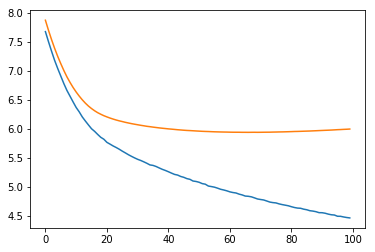

In [24]:
plot_loss(log_path_tw5_cl, 300)

In [83]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_clean_60.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 漫画読んででからな。
tgt: 漫画片付けて早くやれ。
tgt_emotion: anger
inf:  NONE
1[-3.45]: では掃除しましょう! 
2[-3.61]: 掃除しましょう! 
3[-3.66]: お掃除しましょう! 

inf:  neutral
1[-3.42]: では掃除しましょう! 
2[-3.58]: 掃除しましょう! 
3[-3.64]: お掃除しましょう! 

inf:  anger
1[-3.39]: では掃除しましょう! 
2[-3.58]: 掃除しましょう! 
3[-3.67]: お掃除しましょう! 

inf:  sad
1[-3.46]: では掃除しましょう! 
2[-3.64]: 掃除しましょう! 
3[-3.70]: お掃除しましょう! 

inf:  happy
1[-3.42]: では掃除しましょう! 
2[-3.62]: 掃除しましょう! 
3[-3.68]: お掃除しましょう! 

inf:  contentment
1[-3.71]: では掃除しましょう! 
2[-3.87]: 掃除しましょう! 
3[-3.90]: お掃除しましょう! 

Dial 2:
src: たぶんね。
tgt: 今日はここだけ、とかおそうじの場所決めてやってみて。
tgt_emotion: neutral
inf:  NONE
1[-2.55]: AさんAさんが仰っていますか!? 
2[-2.65]: AさんAさんが仰っていますか? 
3[-2.73]: AさんAさんが仰っていますか! 

inf:  neutral
1[-2.61]: AさんAさんが仰っていますか!? 
2[-2.70]: AさんAさんが仰っていますか? 
3[-2.76]: AさんAさんが仰っていますか! 

inf:  anger
1[-2.58]: AさんAさんが仰っていますか!? 
2[-2.71]: AさんAさんが仰っていますか? 
3[-2.76]: AさんAさんが仰っていますか! 

inf:  sad
1[-2.62]: AさんAさんが仰っ

Process Process-26:
Process Process-25:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5

RuntimeError: DataLoader worker (pid 11455) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.

# ☆　twitter dataset -> all domain

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_tw5_fi_all0206

Use emotion: True

Checkpoint path: ./model/pre_twitter_0128_5.mdl

Pretrained: True

Fix embedding: False

max_epoch: 100

dropout: 0.1

MAX_UTTR_LEN: 100

batch_size: 16

hidden_size: 256

EOS_id: 2

tfd_lambda: 0.4

num_layers: 2

decay_step: 600000

inf_last: False

UNK_id: 3

max_gradient: 50.0

l2_pooling: False

Minimize validation loss(5.6317) : 34 Epoch 


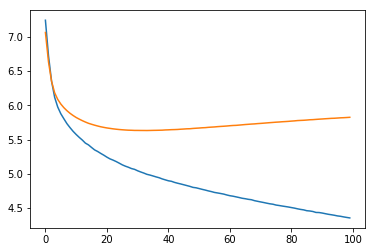

In [23]:
plot_loss(log_path_tw5_all, 300)

In [144]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_tw5_fi_all0206_10.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_tw5_fi_all0206_10.mdl
INFO:logger:Use emotion: True
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 1e-06
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:UNK_id: 3
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:decay_step: 600000
INFO:logger:max_epoch: 100
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: True
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: そーだね。
tgt: お部屋きれいにしたらスムーズにお出かけできるよね。
tgt_emotion: NONE
inf:  NONE
1[-4.22]: Aさんのために頑張りましょう。 
2[-4.34]: Aさんも頑張りましょう。 
3[-4.82]: Aさんも頑張りましょう? 

inf:  neutral
1[-4.25]: Aさんのために頑張りましょう。 
2[-4.30]: Aさんも頑張りましょう。 
3[-4.85]: Aさんも頑張りましょう? 

inf:  anger
1[-4.25]: Aさんのために頑張りましょう。 
2[-4.33]: Aさんも頑張りましょう。 
3[-4.81]: Aさんも頑張りましょう? 

inf:  sad
1[-4.18]: Aさんのために頑張りましょう。 
2[-4.33]: Aさんも頑張りましょう。 
3[-4.78]: Aさんも頑張りましょう? 

inf:  happy
1[-4.18]: Aさんのために頑張りましょう。 
2[-4.31]: Aさんも頑張りましょう。 
3[-4.80]: Aさんも頑張りましょう? 

inf:  contentment
1[-4.23]: Aさんのために頑張りましょう。 
2[-4.36]: Aさんも頑張りましょう。 
3[-4.84]: Aさんも頑張りましょう? 

Dial 2:
src: あんまり掃除好きじゃないんだ。
tgt: ちょっとくらい掃除したらどうだい?
tgt_emotion: neutral
inf:  NONE
1[-1.32]: Aさんのために掃除するのが醍醐味ですよ? 
2[-1.47]: Aさんのために掃除するのが醍醐味ですよ! 
3[-2.38]: Aさんのために掃除するのが醍醐味です 

inf:  neutral
1[-2.83]: 掃除は身体に良くないですよ! 
2[-3.53]: Aさんのために掃除しましょう! 
3[-3.93]: Aさんのために掃除しましょう? 

inf:  anger
1[-2.84]: 掃除は身体に良くないで

In [113]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_tw5_fi_all0206_60.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 散らかってないから掃除しなくて大丈夫。
tgt: 私の測定によると散らかっています。
tgt_emotion: NONE
inf:  NONE
1[-3.03]: では掃除しましょう! 
2[-3.84]: では掃除しましょう。 
3[-4.04]: では掃除しましょう? 

inf:  neutral
1[-3.17]: では掃除しましょう! 
2[-3.42]: では掃除しようよ! 
3[-4.09]: では掃除しましょう。 

inf:  anger
1[-2.96]: では掃除しましょう! 
2[-3.99]: では掃除しましょう。 
3[-4.08]: では掃除しましょう!? 

inf:  sad
1[-3.13]: では掃除しましょう! 
2[-3.86]: では掃除しましょう。 
3[-4.07]: では掃除しましょう? 

inf:  happy
1[-3.15]: では掃除しましょう! 
2[-3.41]: では掃除しようよ! 
3[-4.10]: では掃除しましょう。 

inf:  contentment
1[-3.15]: では掃除しましょう! 
2[-3.80]: では掃除しましょう。 
3[-4.09]: では掃除しましょう? 

Dial 2:
src: 気分が乗らないんだ。
tgt: この先も気分が乗ってくる保証はありませんよ。
tgt_emotion: sad
inf:  NONE
1[-3.25]: Aさんの健康が心配です。 
2[-4.00]: Aさんは健康ではありません! 
3[-4.36]: Aさんは健康ではありません。 

inf:  neutral
1[-3.26]: Aさんの健康が心配です。 
2[-4.03]: Aさんは健康ではありません! 
3[-4.41]: Aさんは健康ではありません。 

inf:  anger
1[-1.64]: Aさんの気持ちが適度が崩れてしまうのです。 
2[-1.81]: Aさんの気持ちが適度が崩れてしまうのです! 
3[-1.85]: Aさんの気持ちが適度が崩れてしまうのです

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f0752a812e8>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 58, in detach
    return r

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0210_tw83_all

Use emotion: True

Checkpoint path: ./model/pre_twitter_0206_83.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

decoder_learning_ratio: 5.0

num_layers: 2

max_gradient: 50.0

tfd_lambda: 0.4

l2_pooling: False

teacher_forcing_ratio: 1.0

dropout: 0.1

max_epoch: 200

learning_rate: 1e-06

batch_size: 16

inf_last: False

hidden_size: 256

Minimize validation loss(5.7606) : 21 Epoch 


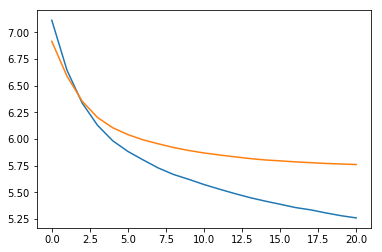

In [51]:
plot_loss(log_path_tw83_all, 300)

In [ ]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0210_tw83_all_22.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/0210_tw83_all_22.mdl
INFO:logger:Use emotion: True
INFO:logger:max_epoch: 200
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:learning_rate: 1e-06
INFO:logger:EOS_id: 2
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:batch_size: 1
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:use_emotion: True
INFO:logger:PAD_id: 0
INFO:logger:decay_step: 600000
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:tfd_lambda: 0.4
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 自分のことだからロボットには関係ない。
tgt: 手伝うから掃除してよ。
tgt_emotion: sad
inf:  NONE
1[-3.37]: Aさんが健康になれませんか? 
2[-3.52]: Aさんが健康になれましたか? 
3[-3.64]: Aさんが健康になれませんか。 

inf:  neutral
1[-3.39]: Aさんが健康になれませんか? 
2[-3.52]: Aさんが健康になれましたか? 
3[-3.67]: Aさんが健康になれませんか。 

inf:  anger
1[-3.38]: Aさんが健康になれませんか? 
2[-3.64]: Aさんが健康になれませんか。 
3[-3.75]: Aさんが健康になれませんか! 

inf:  sad
1[-3.45]: Aさんが健康になれませんか? 
2[-3.54]: Aさんが健康になれましたか? 
3[-3.77]: Aさんが健康になれますよ? 

inf:  happy
1[-3.29]: Aさんが健康になれませんか? 
2[-3.57]: Aさんが健康になれませんか。 
3[-3.63]: Aさんが健康になるよ。 

inf:  contentment
1[-3.28]: Aさんが健康になれませんか? 
2[-3.41]: Aさんが健康になれましたか? 
3[-3.58]: Aさんが健康になれませんか。 

Dial 2:
src: ちょっとじゃん。
tgt: もう塵が積もって山となってます。
tgt_emotion: neutral
inf:  NONE
1[-0.16]: Aさん!!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.16]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

inf:  NONE
1[-0.18]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.26]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.26]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.65]: Aさん!!!!!!!!!!!!!!!!!!! 
2[-0.66]: Aさん!!!!!!!!!!!!!!!!!! 
3[-0.69]: Aさん!!!!!!!!!!!!!!!!! 

inf:  anger
1[-0.14]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.14]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.29]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-0.71]: Aさん!!!!!!!!!!!!!!!!! 
2[-0.72]: Aさん!!!!!!!!!!!!!!!! 
3[-0.75]: Aさん!!!!!!!!!!!!!!! 

inf:  happy
1[-0.17]: Aさん!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# ☆　twitter dataset(former) -> all domain -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0208_tw5_all10_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_10.mdl

Pretrained: True

Fix embedding: False

decay_step: 600000

EOS_id: 2

num_layers: 2

MAX_UTTR_LEN: 100

learning_rate: 1e-07

SOS_id: 1

teacher_forcing_ratio: 1.0

hidden_size: 256

Minimize validation loss(5.8339) : 313 Epoch 
Minimize validation loss(5.8339) : 314 Epoch 
Minimize validation loss(5.8339) : 315 Epoch 
Minimize validation loss(5.8339) : 316 Epoch 
Minimize validation loss(5.8339) : 317 Epoch 
Minimize validation loss(5.8339) : 318 Epoch 
Minimize validation loss(5.8339) : 319 Epoch 
Minimize validation loss(5.8339) : 320 Epoch 
Minimize validation loss(5.8339) : 321 Epoch 


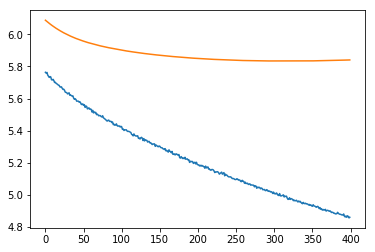

In [149]:
plot_loss(log_path_tw5_all10_cl, 400)

In [151]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl
INFO:logger:Use emotion: True
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 1e-07
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:decay_step: 600000
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:max_epoch: 400
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: True
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger:UNK_id: 3
INFO:logger.dataset:Reading files...
INFO:logger.data

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 怒ればいいじゃん。
tgt: 掃除しないともう話をしない。
tgt_emotion: anger
inf:  NONE
1[-3.15]: どうして怒るのですか? 
2[-3.22]: どうして怒るんだよ! 
3[-3.54]: どうして怒るんだ! 

inf:  neutral
1[-3.15]: どうして怒るのですか? 
2[-3.19]: どうして怒るんだよ! 
3[-3.52]: どうして怒るんだ! 

inf:  anger
1[-3.17]: どうして怒るんだよ! 
2[-3.17]: どうして怒るのですか? 
3[-3.50]: どうして怒るんだ! 

inf:  sad
1[-3.20]: どうして怒るのですか? 
2[-3.24]: どうして怒るんだよ! 
3[-3.59]: どうして怒るんだ! 

inf:  happy
1[-3.14]: どうして怒るのですか? 
2[-3.17]: どうして怒るんだよ! 
3[-3.50]: どうして怒るんだ! 

inf:  contentment
1[-3.17]: どうして怒るのですか? 
2[-3.27]: どうして怒るんだよ! 
3[-3.58]: どうして怒るんだ! 

Dial 2:
src: そーだね。
tgt: お部屋きれいにしたらスムーズにお出かけできるよね。
tgt_emotion: NONE
inf:  NONE
1[-4.07]: Aさんのために頑張りましょう。 
2[-4.43]: Aさんにとって大切な!? 
3[-4.66]: Aさんにとって大切な! 

inf:  neutral
1[-2.61]: Aさんのために一緒に掃除しましょう! 
2[-2.81]: Aさんのために一緒に掃除しましょう!? 
3[-3.18]: Aさんのために一緒に掃除しましょう? 

inf:  anger
1[-2.59]: Aさんのために一緒に掃除しましょう! 
2[-2.78]: Aさんのために一緒に掃除しましょう!? 
3[-3.19]: Aさんのために一緒に掃除しましょう? 

inf

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all40_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_40.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

l2_pooling: False

num_layers: 2

learning_rate: 1e-06

teacher_forcing_ratio: 1.0

dropout: 0.1

tfd_lambda: 0.4

UNK_id: 3

Minimize validation loss(5.7679) : 14 Epoch 


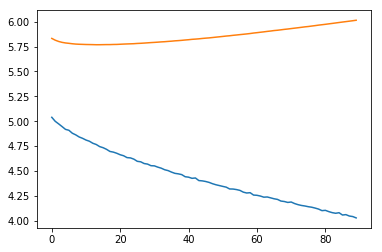

In [118]:
plot_loss(log_path_cleaning, 90)

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all34_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_34.mdl

Pretrained: True

Fix embedding: False

SOS_id: 1

decay_step: 600000

PAD_id: 0

EOS_id: 2

MAX_UTTR_LEN: 100

tfd_lambda: 0.4

batch_size: 16

learning_rate: 1e-07

Minimize validation loss(5.7615) : 90 Epoch 


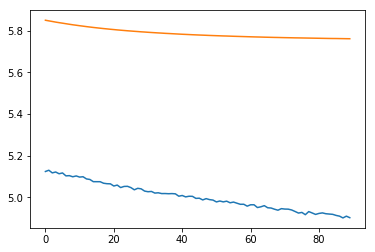

In [110]:
plot_loss(log_path_tw5_all34_cl, 300)

In [112]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 本当に掃除が嫌いなんだ。
tgt: こんなに部屋が汚いと友達も来てくれなくなるよ。
tgt_emotion: NONE
inf:  NONE
1[-3.74]: 掃除をしましょう! 
2[-3.95]: 掃除をしてくれますか。 
3[-4.11]: 掃除をしましょう。 

inf:  neutral
1[-3.70]: 掃除をしましょう! 
2[-4.03]: 掃除をしてくれますか。 
3[-4.14]: 掃除をしましょう。 

inf:  anger
1[-3.62]: 掃除をしましょう! 
2[-4.06]: 掃除をしてくれますか。 
3[-4.18]: 掃除をしましょう。 

inf:  sad
1[-3.83]: 掃除をしましょう! 
2[-3.93]: 掃除をしてくれますか。 
3[-4.13]: 掃除をしましょう。 

inf:  happy
1[-3.64]: 掃除をしましょう! 
2[-4.03]: 掃除をしてくれますか。 
3[-4.12]: 掃除をしましょう。 

inf:  contentment
1[-3.86]: 掃除をしましょう! 
2[-3.97]: 掃除をしてくれますか。 
3[-4.10]: 掃除をしましょう。 

Dial 2:
src: 風邪かもしれないよ。
tgt: 現実から目を背けていたら駄目だよ。
tgt_emotion: anger
inf:  NONE
1[-3.70]: 風邪ひきましょう。 
2[-3.80]: 風邪ひきませんか? 
3[-4.01]: 風邪ひきませんか。 

inf:  neutral
1[-3.69]: 風邪ひきましょう。 
2[-3.80]: 風邪ひきませんか? 
3[-4.02]: 風邪ひきましょう 

inf:  anger
1[-3.70]: 風邪ひきましょう。 
2[-3.79]: 風邪ひきませんか? 
3[-4.01]: 風邪ひきませんか! 

inf:  sad
1[-3.67]: 風邪ひきましょう。 
2[-3.86]: 風邪ひきませんか? 
3[-4.03]: 風邪ひきませ

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f0748bcb7f0>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

# ☆　twitter dataset(former) -> all domain -> cleaning

In [ ]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

# ☆　OpenSubtitles -> cleaning

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/pre_op_0128

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

decay_step: 600000

learning_rate: 0.0001

decoder_learning_ratio: 5.0

PAD_id: 0

num_layers: 2

dropout: 0.1

batch_size: 64

hidden_size: 256

Minimize validation loss(4.9577) : 13 Epoch 


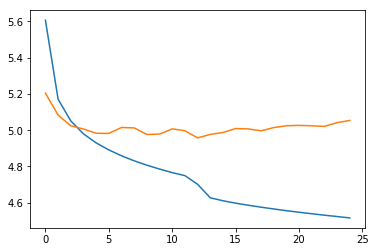

In [19]:
plot_loss(log_path_op,25)

In [16]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/em_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:learning_rate: 0.0001
INFO:logger:EOS_id: 2
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:decay_step: 600000
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:PAD_id: 0
INFO:logger:use_emotion: True
INFO:logger:max_epoch: 50
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:dropout: 0.1
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 気分が乗らないんだ。
tgt: この先も気分が乗ってくる保証はありませんよ。
tgt_emotion: sad
inf:  NONE
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  neutral
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.79]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  anger
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.58]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.79]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  sad
1[-0.48]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.59]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  happy
1[-0.46]: 部屋が汚いまま部屋が汚いまま部屋が汚れています。 
2[-0.49]: 部屋が汚いまま部屋が汚いまま部屋が汚れていますよ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

inf:  contentment
1[-0.47]: 部屋が汚いまま部屋が汚いままになったら、掃除しろよ。 
2[-0.57]: 部屋が汚いまま部屋が汚いままになったら、掃除しろ。 
3[-0.80]: 部屋が汚いまま部屋が汚れていますよ。 

Dial 2:
src: もうある程度の場所は覚えたよ。
tgt: これだけ物が散乱していると掃除機をかけることも出来ないじゃない。
tgt_emotion: anger
inf:  NONE
1[-0.95]: 部屋が汚いまま部屋が汚れています。 
2[

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0208_op13_all

Use emotion: True

Checkpoint path: ./model/pre_op_0128_13.mdl

Pretrained: True

Fix embedding: False

dropout: 0.1

tfd_lambda: 0.4

lr_decay: 0.5773502691896258

num_layers: 2

SOS_id: 1

max_gradient: 50.0

max_epoch: 400

teacher_forcing_ratio: 1.0

decay_step: 600000

decoder_learning_ratio: 5.0

l2_pooling: False

hidden_size: 256

batch_size: 16

Minimize validation loss(4.3501) : 206 Epoch 
Minimize validation loss(4.3501) : 207 Epoch 


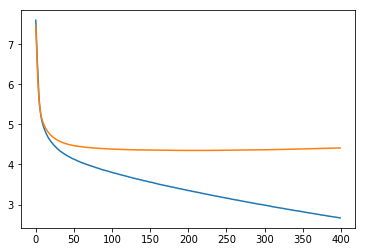

In [46]:
plot_loss(log_path_op13_all,400)

In [50]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op13_all_206.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/em_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/0208_op13_all_206.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:UNK_id: 3
INFO:logger:len_alpha: 0.6
INFO:logger:beam_width: 5
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:EOS_id: 2
INFO:logger:learning_rate: 1e-06
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:inf_last: False
INFO:logger:eos_gamma: 0.05
INFO:logger:batch_size: 1
INFO:logger:PAD_id: 0
INFO:logger:use_emotion: True
INFO:logger:max_epoch: 400
INFO:logger:decay_step: 600000
INFO:logger:suppress_lambda: 1.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_gradient: 50.0
INFO:logger:l2_pooling: False
INFO:logger:tfd_lambda: 0.4
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:hidden_size: 256


Loading the test dataset...


INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 202 dialogues


Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 悲しまないで〜
tgt:  ⁇ ヵ月前に「屑!カス!」と言われて振られましたね。
tgt_emotion: sad
inf:  NONE
1[-1.59]: Aさんが悲しむのは悲しいです! 
2[-1.73]: Aさんが悲しむのは悲しいですよ! 
3[-1.77]: Aさんが悲しむのは悲しいです。 

inf:  neutral
1[-1.60]: Aさんが悲しむのは悲しいです! 
2[-1.74]: Aさんが悲しむのは悲しいですよ! 
3[-1.77]: Aさんが悲しむのは悲しいです。 

inf:  anger
1[-1.59]: Aさんが悲しむのは悲しいです! 
2[-1.72]: Aさんが悲しむのは悲しいですよ! 
3[-1.78]: Aさんが悲しむのは悲しいです。 

inf:  sad
1[-1.59]: Aさんが悲しむのは悲しいです! 
2[-1.76]: Aさんが悲しむのは悲しいです。 
3[-1.77]: Aさんが悲しむのは悲しいですよ! 

inf:  happy
1[-1.59]: Aさんが悲しむのは悲しいです! 
2[-1.74]: Aさんが悲しむのは悲しいですよ! 
3[-1.77]: Aさんが悲しむのは悲しいです。 

inf:  contentment
1[-1.59]: Aさんが悲しむのは悲しいです! 
2[-1.71]: Aさんが悲しむのは悲しいですよ! 
3[-1.77]: Aさんが悲しむのは悲しいです。 

Dial 2:
src: そんな神経質にならなくても...
tgt: いえ、既に ⁇ ヵ月掃除をサボっています。
tgt_emotion: neutral
inf:  NONE
1[-0.43]: ................................................................................................... 
2[-0.45]: ................................................................................

inf:  happy
1[-1.40]: Aさんが病気になったら体に良くないですよ。 
2[-1.50]: Aさんが病気になったら体に悪いですよ。 
3[-1.66]: Aさんが病気になったら体調が悪いんだよ! 

inf:  contentment
1[-3.61]: Aさんのためです。 
2[-3.81]: Aさん! 
3[-3.90]: Aさんのためです!! 

Dial 9:
src: 必要な物が取りやすくていいんだよ。
tgt: どこに何を置いてあるか分からなくなるでしょう。
tgt_emotion: anger
inf:  NONE
1[-0.44]: Aさんの生活改善の為に生活改善するために派遣されていないのですか? 
2[-0.45]: Aさんの生活改善の為に生活改善するために派遣されているのですか? 
3[-0.66]: Aさんの生活改善の為に生活改善するためにここにいるのですか? 

inf:  neutral
1[-0.44]: Aさんの生活改善の為に生活改善するために派遣されていないのですか? 
2[-0.46]: Aさんの生活改善の為に生活改善するために派遣されているのですか? 
3[-0.74]: Aさんの生活改善の為に生活改善するために派遣されています。 

inf:  anger
1[-0.44]: Aさんの生活改善の為に生活改善するために派遣されていないのですか? 
2[-0.46]: Aさんの生活改善の為に生活改善するために派遣されているのですか? 
3[-0.66]: Aさんの生活改善の為に生活改善するためにここにいるのですか? 

inf:  sad
1[-0.45]: Aさんの生活改善の為に生活改善するために派遣されていないのですか? 
2[-0.46]: Aさんの生活改善の為に生活改善するために派遣されているのですか? 
3[-0.66]: Aさんの生活改善の為に生活改善するためにここにいるのですか? 

inf:  happy
1[-0.44]: Aさんの生活改善の為に生活改善するために派遣されていないのですか? 
2[-0.45]: Aさんの生活改善の為に生活改善するために派遣されているのですか? 
3[-0.66]: Aさんの生活改善の為に生活改善するためにここにいるのですか? 

inf:  contentmen

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fed96a9ac88>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 58, in detach
    return r